In [1]:
import numpy as np
import pandas as pd



In [2]:
df = pd.read_csv('datasetml/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


#### Steps

- 0. Preprocess + EDA + Feature Selection
- 1. Extract input and output columns
- 2. Scale the values
- 3. Train test split
- 4. Train the Model
- 5. Evaluate the model/model selection.
- 6. Deploy the model

In [3]:
# Remove the unnecessary column
df= df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


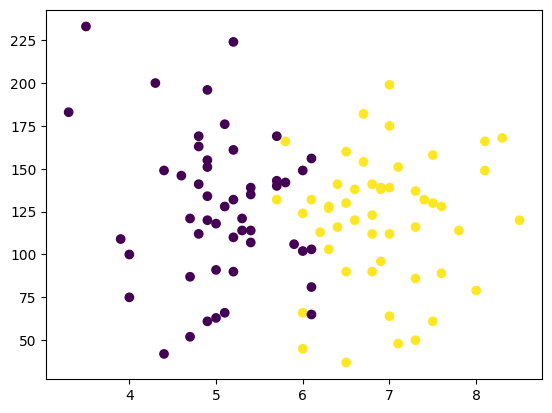

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [5]:
# logistic regression will classify the data.

# lets keep our independent variable separately

x = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [6]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [7]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [8]:
y.shape

(100,)

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)
x_train
y_train

82    1
9     0
79    1
8     0
36    0
     ..
71    1
37    1
64    1
74    1
72    1
Name: placement, Length: 90, dtype: int64

In [10]:
x_test

,cgpa,iq
88,4.4,149.0
0,6.8,123.0
75,4.8,169.0
45,6.0,66.0
65,8.1,166.0
66,6.9,96.0
99,6.2,113.0
48,6.6,138.0
41,5.4,114.0
14,6.1,103.0


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.45645834, -2.13085068],
       [-0.76205334, -1.4170116 ],
       [ 0.45645834, -0.82624822],
       [ 0.10831215,  0.79835106],
       [-0.23983405,  0.40450881],
       [ 1.32682383,  0.84758134],
       [-0.67501679, -0.33394541],
       [-0.93612644,  0.25681797],
       [-1.02316298,  0.42912395],
       [ 0.10831215, -1.04778449],
       [ 0.54349489, -0.087794  ],
       [-0.23983405,  0.47835423],
       [-1.80649192, -0.35856055],
       [-0.58798024, -0.06317886],
       [ 0.63053144,  1.43834472],
       [-0.84908989, -0.13702428],
       [-1.11019953, -1.76162357],
       [-0.93612644,  1.78295669],
       [-0.50094369,  0.37989367],
       [ 0.45645834,  0.15835741],
       [ 2.02311622,  1.09373275],
       [ 0.71756799, -0.28471513],
       [-0.84908989, -1.49085702],
       [ 0.89164109,  0.37989367],
       [-0.93612644,  0.67527536],
       [-0.23983405,  0.20758769],
       [-1.11019953, -0.06317886],
       [-1.19723608,  0.55219966],
       [ 1.41386038,

In [12]:
x_test = scaler.transform(x_test)
x_test

array([[-1.37130918,  0.62604508],
       [ 0.71756799, -0.01394858],
       [-1.02316298,  1.11834789],
       [ 0.0212756 , -1.4170116 ],
       [ 1.84904312,  1.04450247],
       [ 0.80460454, -0.67855738],
       [ 0.1953487 , -0.26009999],
       [ 0.54349489,  0.35527853],
       [-0.50094369, -0.23548485],
       [ 0.10831215, -0.50625139]])

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Model Training
clf.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_predict = clf.predict(x_test)
y_predict

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [15]:
y_test

88    0
0     1
75    0
45    1
65    1
66    1
99    1
48    1
41    0
14    0
Name: placement, dtype: int64

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.8

<Axes: >

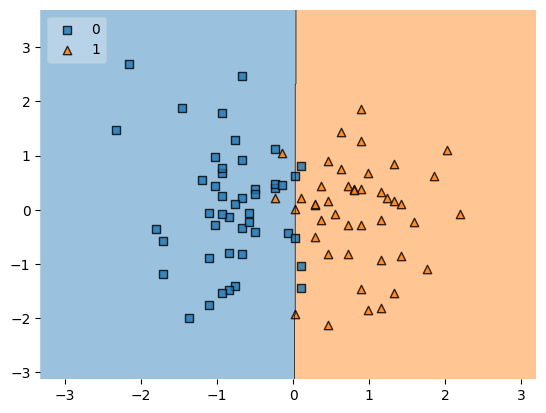

In [18]:
from mlxtend.plotting import plot_decision_regions
import numpy as np

# Convert y_train to a NumPy array
y_train_np = y_train.values

# Plot decision regions
plot_decision_regions(x_train, y_train_np, clf=clf, legend=2)


In [22]:
import pickle

# pickle convert file into object

pickle.dump(clf,open('model.pkl','wb'))